# Implementation 7 - Discriminant Analysis

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

In [51]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [52]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,no
1,15810944,Male,35,20000,no
2,15668575,Female,26,43000,no
3,15603246,Female,27,57000,no
4,15804002,Male,19,76000,no
5,15728773,Male,27,58000,no
6,15598044,Female,27,84000,no
7,15694829,Female,32,150000,yes
8,15600575,Male,25,33000,no
9,15727311,Female,35,65000,no


In [53]:
X = dataset[['Age', 'EstimatedSalary']].values
print(X[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [54]:
print(dataset['Purchased'][:10].values)

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']


## Inspecting the data set

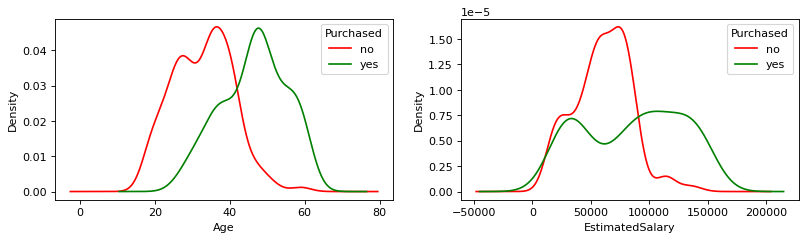

In [55]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i_purchase, purchase in enumerate(['no', 'yes']):
        (dataset[feature_list[i_axs]][dataset['Purchased']==purchase]).plot(kind='density', label=purchase, c=['red', 'green'][i_purchase], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='Purchased')
plt.show()   

Alternative:

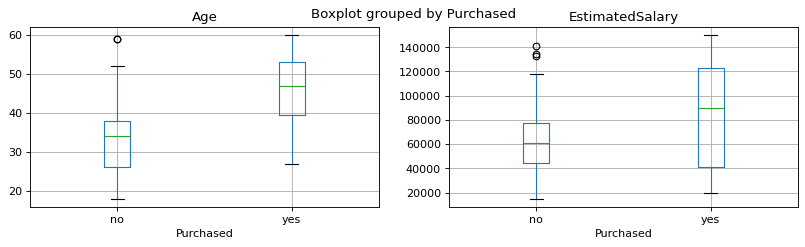

In [56]:
feature_list = ['Age', 'EstimatedSalary']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    dataset.boxplot(column=feature_list[i_axs], by='Purchased', ax=axs[i_axs])
plt.show()  

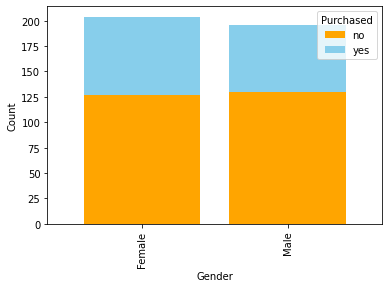

In [57]:
df_plot = dataset.groupby(['Gender', 'Purchased']).size().reset_index().pivot(index='Gender', columns='Purchased', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)
plt.ylabel('Count')
plt.show() 

## Preparing the data set

**Encoding:**

In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset['Purchased'])
print(y[:10])

[0 0 0 0 0 0 0 1 0 0]


**Train-test split:**

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (300, 2) (300,)
Test set: (100, 2) (100,)


In [60]:
print(X_train[:10])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]]


**Feature scaling:**

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
X_train[:10]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153]])

## Training the logistic regression model

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = {'classifier': LogisticRegression()}
log_reg['classifier'].fit(X_train, y_train)

LogisticRegression()

We can check what prediction is made on some examples:

In [69]:
print(label_encoder.inverse_transform(log_reg['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [70]:
print(label_encoder.inverse_transform(log_reg['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Training the LDA model

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = {'classifier': LinearDiscriminantAnalysis()}
lda['classifier'].fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [73]:
print(label_encoder.inverse_transform(lda['classifier'].predict(sc.transform([[30,200000]]))))

['yes']


In [74]:
print(label_encoder.inverse_transform(lda['classifier'].predict(sc.transform([[30,100000]]))))

['no']


## Making predictions

**Probability of purchasing:**

In [76]:
log_reg['y_proba'] = log_reg['classifier'].predict_proba(X_test)

In [78]:
lda['y_proba'] = lda['classifier'].predict_proba(X_test)
lda['y_proba'][:10]

array([[0.8879718 , 0.1120282 ],
       [0.82428321, 0.17571679],
       [0.80527576, 0.19472424],
       [0.9090654 , 0.0909346 ],
       [0.89518864, 0.10481136],
       [0.99017693, 0.00982307],
       [0.98127933, 0.01872067],
       [0.3139118 , 0.6860882 ],
       [0.99342787, 0.00657213],
       [0.48775784, 0.51224216]])

**Prediction of the class and comparison with the true one:**

In [79]:
log_reg['y_pred'] = log_reg['classifier'].predict(X_test)

In [81]:
lda['y_pred'] = lda['classifier'].predict(X_test)
print(np.concatenate((lda['y_pred'].reshape(len(lda['y_pred']),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]]


## Performance assessment

**Confusion matrix:**

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda['y_pred'])
print(cm)

[[65  3]
 [ 7 25]]


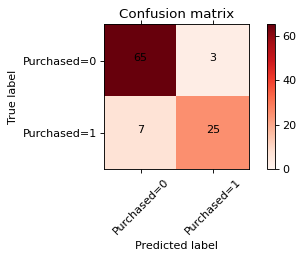

In [83]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Purchased=0','Purchased=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Accuracy, precision, recall:**

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, log_reg['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, log_reg['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, log_reg['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.75


In [86]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, lda['y_pred']),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, lda['y_pred']),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, lda['y_pred']),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.89
Recall (proportion of true purchases that are correctly predicted) is 0.78


**ROC curve and AUC:**

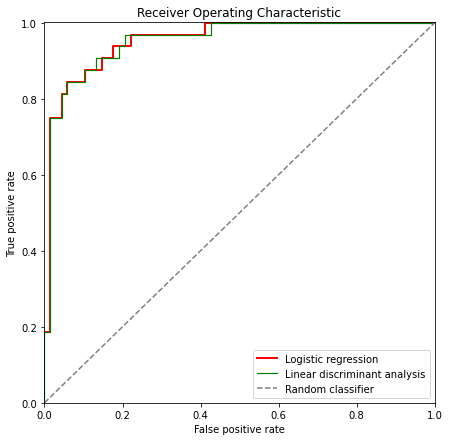

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score

log_reg['y_score'] = log_reg['y_proba'][:,1]
lda['y_score'] = lda['y_proba'][:,1]

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve for logistic regression
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, log_reg['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=2, label='Logistic regression')

# Plot ROC curve for LDA
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lda['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=1.2, label='Linear discriminant analysis')

# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')

plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [91]:
print('AUC for logistic regression: ', roc_auc_score(y_test, log_reg['y_score']))
print('AUC for LDA: ', roc_auc_score(y_test, lda['y_score']))

AUC for logistic regression:  0.9540441176470588
AUC for LDA:  0.9540441176470588


## Plotting class domains

**On test set**

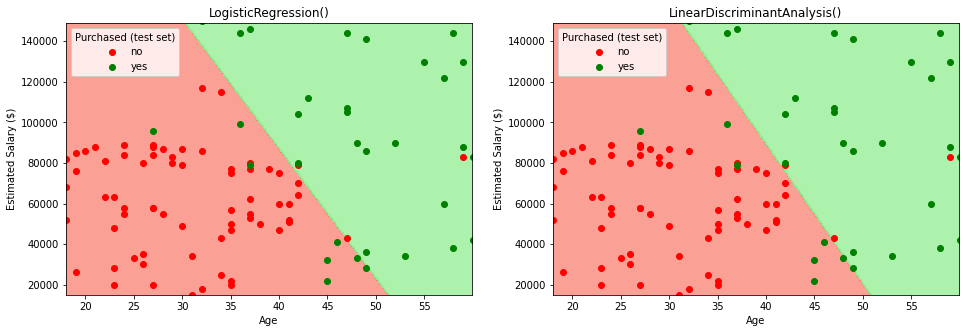

In [92]:
classifier_list = [log_reg, lda]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5))
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('Age')
    axs[i_axs].set_ylabel('Estimated Salary ($)')

plt.show() 

## Quadratic Linear Analysis

In [94]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
qda = {'classifier': QuadraticDiscriminantAnalysis()}
qda['classifier'].fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [95]:
qda['y_proba'] = qda['classifier'].predict_proba(X_test)
qda['y_pred'] = qda['classifier'].predict(X_test)
qda['y_score'] = qda['y_proba'][:,1]

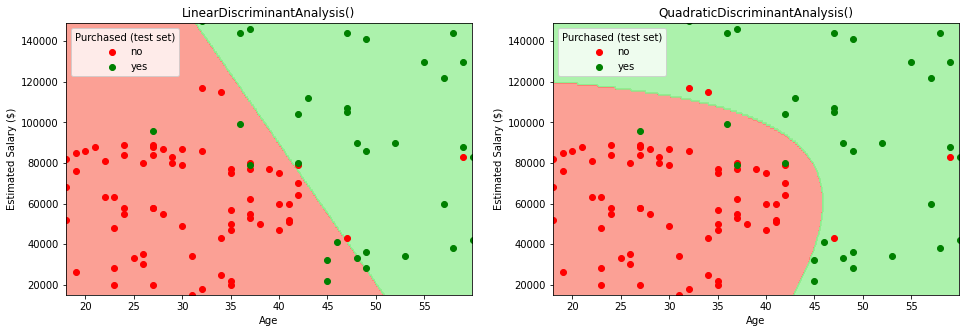

In [96]:
classifier_list = [lda, qda]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5))
X_set, y_set = sc.inverse_transform(X_test), label_encoder.inverse_transform(y_test)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.1),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 1000))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
    
    axs[i_axs].contourf(X1, X2, classifier['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].legend(title='Purchased (test set)')
#     axs[i_axs].set_title('Logistic Regression (Training set)')
    axs[i_axs].set_title(str(classifier['classifier']))
    axs[i_axs].set_xlabel('Age')
    axs[i_axs].set_ylabel('Estimated Salary ($)')

plt.show() 

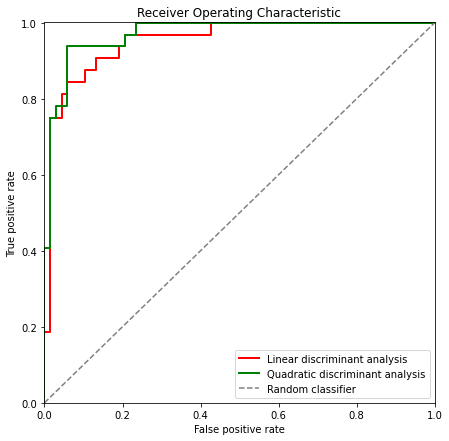

In [97]:
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve for LDA
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, lda['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=2, label='Linear discriminant analysis')

# Plot ROC curve for QDA
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, qda['y_score'])
plt.plot(false_positive_rate, true_positive_rate, c='green', linewidth=2, label='Quadratic discriminant analysis')

# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')

plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()